In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1

In [2]:
df = pd.read_csv("invest.txt", sep=" ")
df.head(5)

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## Exercise 2

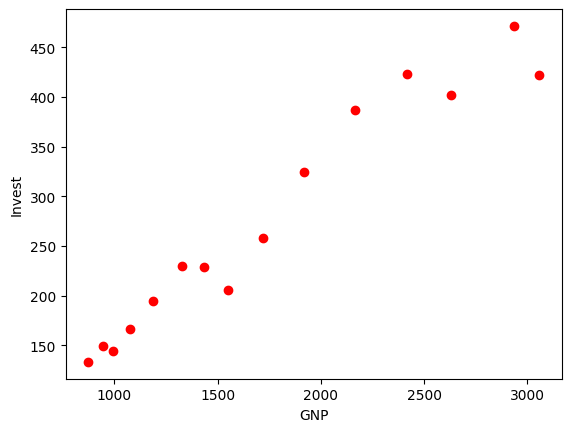

In [3]:
plt.scatter(df["gnp"], df["invest"], color='r')
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.show()

In [4]:
df["gnp"] = np.log(df["gnp"])
df["invest"] = np.log(df["invest"])

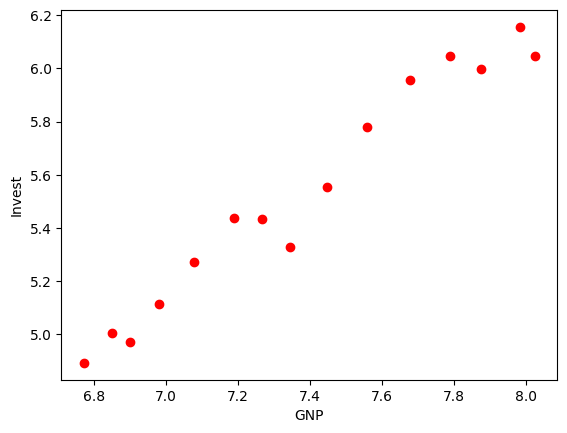

In [5]:
plt.scatter(df["gnp"], df["invest"], color='r')
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.show()

## Exercise 3

In [6]:
X = df["gnp"]
Y = df["invest"]

Xm = X.mean()
Ym = Y.mean()

Xc = X - Xm
Yc = Y - Ym

n = X.shape[0]

In [7]:
beta_1 = np.sum(Xc * Yc) / np.sum(Xc ** 2)
beta_0 = Ym - beta_1 * Xm

Y_pred = beta_0 + beta_1 * X

var = np.sum((Y - Y_pred) ** 2) / (n - 2)
R2 = 1 - np.sum((Y - Y_pred) ** 2) / np.sum((Y - Ym) ** 2)

var_beta_0 = var * (1/n + Xm ** 2 / np.sum(Xc ** 2))
var_beta_1 = var / np.sum(Xc ** 2)

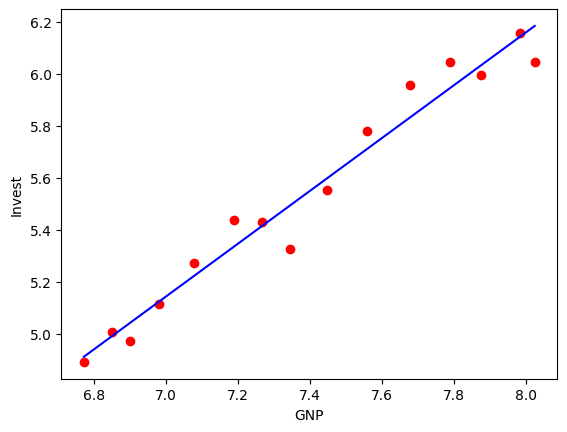

In [8]:
plt.scatter(X, Y, color='r')
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.plot(X, Y_pred, color='b')
plt.show()

In [9]:
print(f"β₀: {beta_0:.3f}\tσ₀: {np.sqrt(var_beta_0):.3f}")
print(f"β₁: {beta_1:.3f}\tσ₁: {np.sqrt(var_beta_1):.3f}")
print(f"\nR²: {R2:.3f}")

β₀: -1.964	σ₀: 0.410
β₁: 1.015	σ₁: 0.055

R²: 0.963


## Exercise 4

In [10]:
from scipy import stats

def p_value(t_stat, deg):
    return 2 * (1 - stats.t.cdf(abs(t_stat), deg))

print(f"p-value β₀:\t{p_value(beta_0 / np.sqrt(var_beta_0), n - 2)}")
print(f"p-value β₁:\t{p_value(beta_1 / np.sqrt(var_beta_1), n - 2)}")

p-value β₀:	0.0003502531377899132
p-value β₁:	1.1363709973011282e-10


## Exercise 5

In [11]:
def CI(x, deg, alpha):
    y_pred = beta_0 + beta_1 * x

    quantile = stats.t.ppf(1 - alpha / 2, deg)
    ci = quantile * np.sqrt(var * (1/n + (x - Xm) ** 2 / np.sum(Xc ** 2)))
    
    return ci

def PI(x, deg, alpha):
    y_pred = beta_0 + beta_1 * x
    
    quantile = stats.t.ppf(1 - alpha / 2, deg)
    pi = quantile * np.sqrt(var * (1 + 1/n + (x - Xm) ** 2 / np.sum(Xc ** 2)))
    
    return pi

gnp = 1000
x = np.log(gnp)

investment = beta_0 + beta_1 * x
ci = CI(x, n - 2, 0.1)
pi = PI(x, n - 2, 0.1)

f = lambda x: np.exp(x)

ci_u = f(investment + ci)
ci_l = f(investment - ci)

pi_u = f(investment + pi)
pi_l = f(investment - pi)

investment = f(investment)

print(f"For GNP = {gnp},")
print(f"CI: {ci_l:.5f},  {ci_u:.5f}")
print(f"PI: {pi_l:.5f},  {pi_u:.5f}")

For GNP = 1000,
CI: 146.67553,  165.87349
PI: 132.00239,  184.31168


## Exercise 6

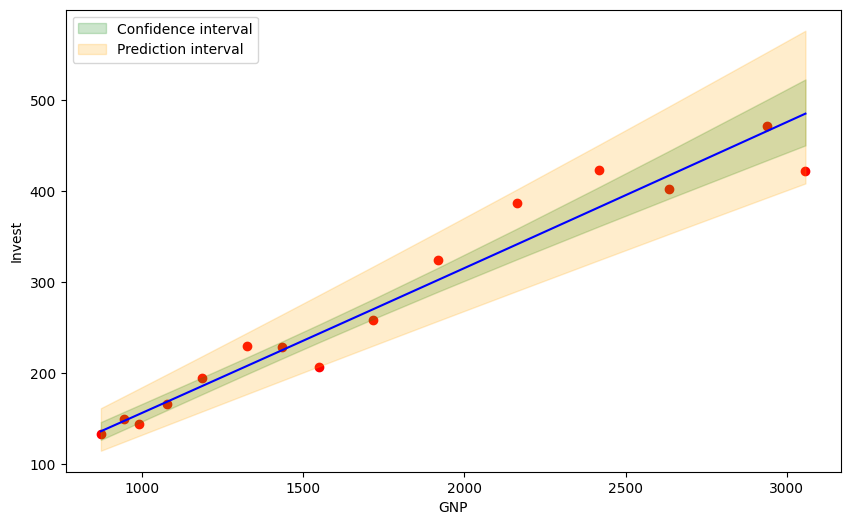

In [12]:
ci = CI(X, n - 2, 0.1)
pi = PI(X, n - 2, 0.1)

plt.figure(figsize=(10, 6))

plt.scatter(f(X), f(Y), color='r')
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.plot(f(X), f(Y_pred), color='b')

plt.fill_between(f(X), f(Y_pred + ci), f(Y_pred - ci), color='green', alpha=0.2, label="Confidence interval")
plt.fill_between(f(X), f(Y_pred + pi), f(Y_pred - pi), color='orange', alpha=0.2, label="Prediction interval")

plt.legend()
plt.show()

## Exercise 7

In [13]:
from sklearn.linear_model import LinearRegression

X = X.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)

slope_sklearn = model.coef_[0]
intercept_sklearn = model.intercept_
r_squared_sklearn = model.score(X, Y)
predicted_log_invest_sklearn = model.predict([[np.log(1000)]])[0]

print(f"\nRegression results (sklearn):")
print(f"  Intercept: {intercept_sklearn:.4f}")
print(f"  Slope: {slope_sklearn:.4f}")
print(f"  R²: {r_squared_sklearn:.4f}")
print(f"  Predicted log(Investment) for GNP=1000: {predicted_log_invest_sklearn:.4f}")


Regression results (sklearn):
  Intercept: -1.9636
  Slope: 1.0153
  R²: 0.9628
  Predicted log(Investment) for GNP=1000: 5.0497


## Exercise 8

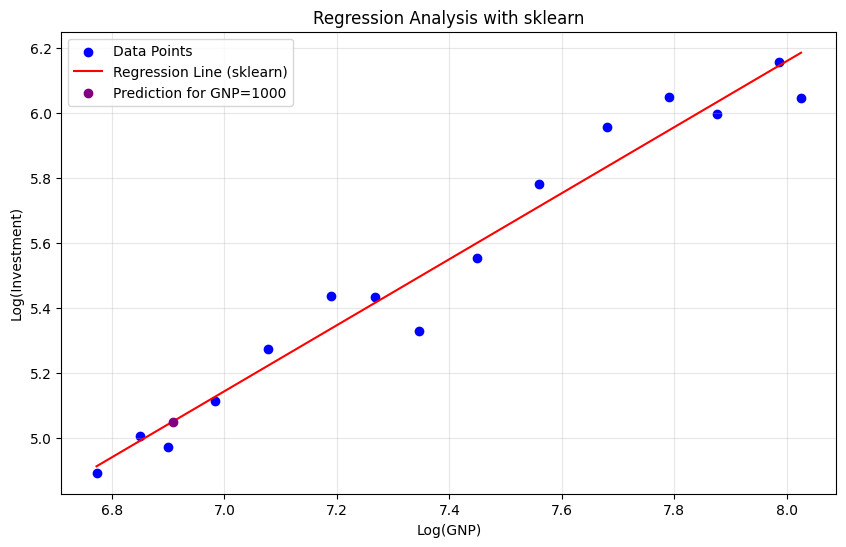

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, model.predict(X.reshape(-1, 1)), color="red", label="Regression Line (sklearn)")
plt.scatter([np.log(1000)], [predicted_log_invest_sklearn], color="purple", label="Prediction for GNP=1000", zorder=5)
plt.title("Regression Analysis with sklearn")
plt.xlabel("Log(GNP)")
plt.ylabel("Log(Investment)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Exercise 9

In [15]:
p = 2
X = np.hstack((np.ones((n, 1)), df["gnp"].values.reshape(n, 1), df["interest"].values.reshape(n, 1)))
gram = X.T @ X
np.linalg.eig(gram).eigenvalues

array([1.73787190e+03, 1.82369697e-02, 4.12140362e+01])

Since all eigenvalues are different than 0, Gram's matrix is full rank.

## Exercise 10

In [16]:
theta = np.linalg.inv(gram) @ X.T @ Y

In [17]:
Y_pred = X @ theta
s2 = np.sum((Y - Y_pred) ** 2) / (n - p - 1)

C = s2 * np.linalg.inv(gram)
theta_var = C.diagonal()
theta_std = np.sqrt(theta_var)

R2 = 1 - np.sum((Y - Y_pred) ** 2) / np.sum((Y - Ym) ** 2)
t_stats = theta / theta_std

p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), n - p - 1))

In [18]:
print(theta_std)
print(R2)
print(t_stats)
print(p_values)

[0.6623992  0.10206138 0.01534421]
0.9633108306726242
[-3.29175327 10.30010285 -0.4254948 ]
[6.43836705e-03 2.59951685e-07 6.78007142e-01]


## Exercise 11

In [19]:
gnp = 1000
interest = 10

x = np.array([1, np.log(gnp), interest])
y_pred = x.T @ theta
print(y_pred)

alpha = 0.01

ci = stats.t.ppf(1 - alpha / 2, n - p - 1) * np.sqrt(s2 * x.T @ np.linalg.inv(gram) @ x)
pi = stats.t.ppf(1 - alpha / 2, n - p - 1) * np.sqrt(s2 * (1 + x.T @ np.linalg.inv(gram) @ x))

print(f"CI: [{y_pred - ci}, {y_pred + ci}]")
print(f"PI: [{y_pred - pi}, {y_pred + pi}]")

5.015983730481467
CI: [4.750131361300164, 5.28183609966277]
PI: [4.632428494152592, 5.399538966810342]


## Exercise 12

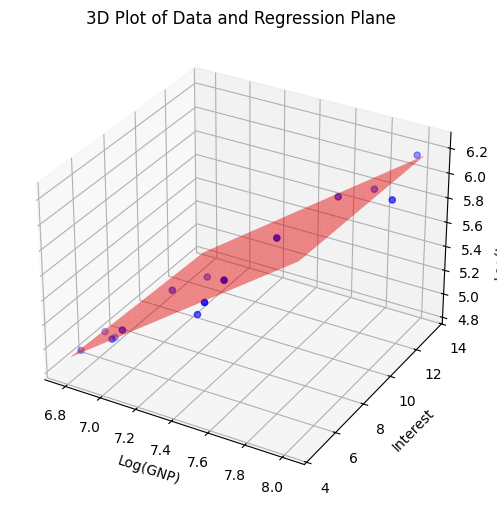

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Create a mesh grid for plotting
log_gnp_range = np.linspace(np.min(df["gnp"]), np.max(df["gnp"]), 100)
interest_range = np.linspace(np.min(df["interest"]), np.max(df["interest"]), 100)
log_gnp_mesh, interest_mesh = np.meshgrid(log_gnp_range, interest_range)

# Calculate the predicted log(Investment) values for the mesh grid
pred_mesh = theta[0] + theta[1] * log_gnp_mesh + theta[2] * interest_mesh

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["gnp"], df["interest"], df["invest"], color="blue", label="Data Points")
ax.plot_surface(log_gnp_mesh, interest_mesh, pred_mesh, color="red", alpha=0.5, label="Regression Plane")

# Add confidence and prediction interval surfaces similarly if needed

ax.set_xlabel("Log(GNP)")
ax.set_ylabel("Interest")
ax.set_zlabel("Log(Investment)")
ax.set_title("3D Plot of Data and Regression Plane")
plt.show()

## Exercise 13

In [21]:
X_sk = np.column_stack((df["gnp"], df["interest"]))
y_sk = np.log(df["invest"])

# Fit the model
model = LinearRegression().fit(X_sk, y_sk)

# Coefficients and R-squared
print(f"Estimated coefficients: {model.intercept_}, {model.coef_}")
print(f"R-squared: {model.score(X_sk, y_sk):.4f}")

Estimated coefficients: 0.2788493351806216, [ 0.19569731 -0.00215047]
R-squared: 0.9626
